# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&lat={lat}&lon={lon}&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | weno
Processing Record 5 of Set 1 | yekaterinoslavka
Processing Record 6 of Set 1 | namibe
Processing Record 7 of Set 1 | forster
Processing Record 8 of Set 1 | aberdeen
Processing Record 9 of Set 1 | scottburgh
Processing Record 10 of Set 1 | ust-tsilma
Processing Record 11 of Set 1 | badger
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | bardai
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | nemuro
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | qaqortoq
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | sinabang


Processing Record 42 of Set 4 | ouani
Processing Record 43 of Set 4 | borba
Processing Record 44 of Set 4 | itanhem
Processing Record 45 of Set 4 | fuvahmulah
City not found. Skipping...
Processing Record 46 of Set 4 | cole harbour
Processing Record 47 of Set 4 | gandajika
Processing Record 48 of Set 4 | bakanas
Processing Record 49 of Set 4 | tuy hoa
Processing Record 0 of Set 5 | guarapuava
Processing Record 1 of Set 5 | fray luis beltran
Processing Record 2 of Set 5 | kaa-khem
Processing Record 3 of Set 5 | afaahiti
Processing Record 4 of Set 5 | castillos
Processing Record 5 of Set 5 | jutai
Processing Record 6 of Set 5 | rundu
Processing Record 7 of Set 5 | sitka
Processing Record 8 of Set 5 | minas de marcona
Processing Record 9 of Set 5 | uturoa
Processing Record 10 of Set 5 | santa cruz cabralia
Processing Record 11 of Set 5 | wailua homesteads
Processing Record 12 of Set 5 | mount pearl
Processing Record 13 of Set 5 | salaqi
Processing Record 14 of Set 5 | tanrake village
City

City not found. Skipping...
Processing Record 31 of Set 8 | revda
Processing Record 32 of Set 8 | holualoa
Processing Record 33 of Set 8 | falmouth
Processing Record 34 of Set 8 | hayma'
City not found. Skipping...
Processing Record 35 of Set 8 | gremda
Processing Record 36 of Set 8 | mahanoro
Processing Record 37 of Set 8 | el granada
Processing Record 38 of Set 8 | coahuayana de hidalgo
Processing Record 39 of Set 8 | okondja
Processing Record 40 of Set 8 | east london
Processing Record 41 of Set 8 | klyuchi
Processing Record 42 of Set 8 | sikasso
Processing Record 43 of Set 8 | sorsk
Processing Record 44 of Set 8 | mhamid
Processing Record 45 of Set 8 | beaufort west
Processing Record 46 of Set 8 | nejo
Processing Record 47 of Set 8 | lerwick
Processing Record 48 of Set 8 | furukawa
Processing Record 49 of Set 8 | selkirk
Processing Record 0 of Set 9 | hit
Processing Record 1 of Set 9 | ayorou
Processing Record 2 of Set 9 | puerto leguizamo
Processing Record 3 of Set 9 | puerto sant

Processing Record 18 of Set 12 | leh
Processing Record 19 of Set 12 | isiro
Processing Record 20 of Set 12 | brookings
Processing Record 21 of Set 12 | conduaga
Processing Record 22 of Set 12 | maqat
Processing Record 23 of Set 12 | domna
Processing Record 24 of Set 12 | arraial do cabo
Processing Record 25 of Set 12 | tafuna
Processing Record 26 of Set 12 | nova sintra
Processing Record 27 of Set 12 | temerluh
Processing Record 28 of Set 12 | mahina
Processing Record 29 of Set 12 | challapata
Processing Record 30 of Set 12 | muli
Processing Record 31 of Set 12 | dean funes
Processing Record 32 of Set 12 | fuling
Processing Record 33 of Set 12 | am timan
Processing Record 34 of Set 12 | nacozari de garcia
Processing Record 35 of Set 12 | peace river
Processing Record 36 of Set 12 | novyy urgal
Processing Record 37 of Set 12 | mount isa
Processing Record 38 of Set 12 | guarapari
Processing Record 39 of Set 12 | longonjo
Processing Record 40 of Set 12 | hillsborough
Processing Record 41 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,54.90,61,3,5.86,ZA,1684964185
1,stanley,54.8680,-1.6985,54.73,77,100,0.00,GB,1684964185
2,weno,7.4515,151.8468,78.75,83,75,3.44,FM,1684964186
3,yekaterinoslavka,50.3734,129.1139,62.13,59,100,11.34,RU,1684964186
4,namibe,-15.1961,12.1522,69.53,75,1,10.36,AO,1684964186


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,54.90,61,3,5.86,ZA,1684964185
1,stanley,54.8680,-1.6985,54.73,77,100,0.00,GB,1684964185
2,weno,7.4515,151.8468,78.75,83,75,3.44,FM,1684964186
3,yekaterinoslavka,50.3734,129.1139,62.13,59,100,11.34,RU,1684964186
4,namibe,-15.1961,12.1522,69.53,75,1,10.36,AO,1684964186


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

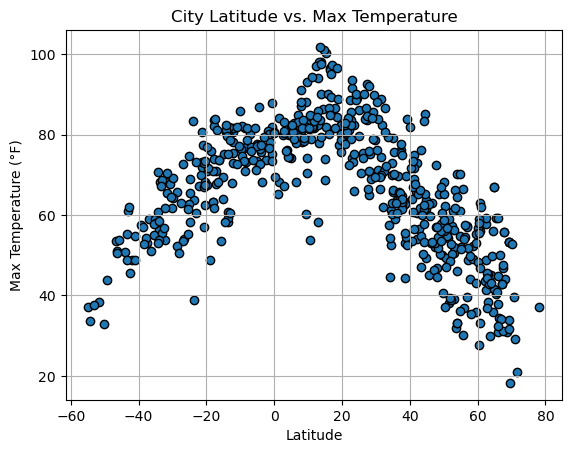

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

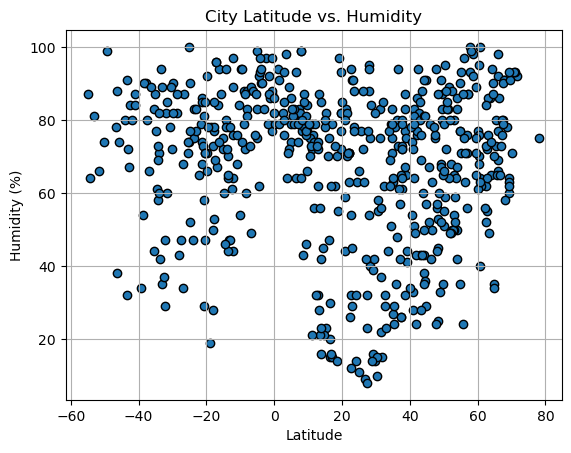

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

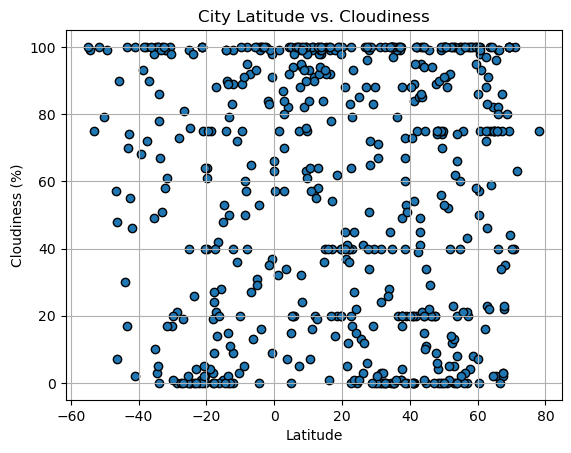

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

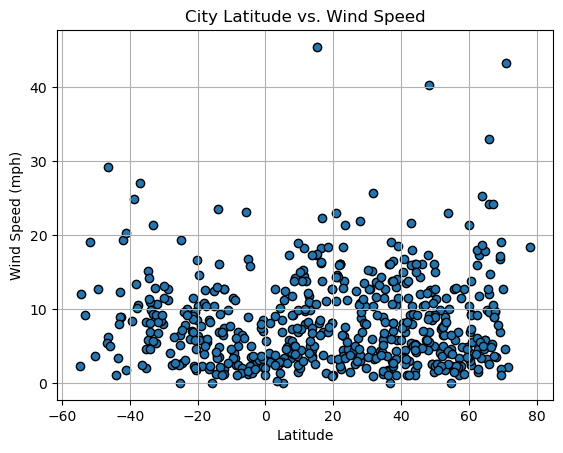

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, hemisphere):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black")
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the linear regression equation and r-value
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    r_value = f"r = {rvalue:.2f}"
    plt.annotate(equation, (min(x_values), min(y_values)), fontsize=12, color="red")
    plt.annotate(r_value, (min(x_values), min(y_values) + (max(y_values)-min(y_values))/4), fontsize=12, color="red")
    
    # Set the title, x-label, y-label, and grid
    title = f"{hemisphere} Hemisphere: {y_label} vs. {x_label}"
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
    # Save the figure
    plt.savefig(f"output_data/{hemisphere}_{x_label}_{y_label}.png")
    
    # Show the plot
    plt.show()


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,stanley,54.8680,-1.6985,54.73,77,100,0.00,GB,1684964185
2,weno,7.4515,151.8468,78.75,83,75,3.44,FM,1684964186
3,yekaterinoslavka,50.3734,129.1139,62.13,59,100,11.34,RU,1684964186
6,aberdeen,57.1437,-2.0981,48.69,87,20,1.14,GB,1684964004
8,ust-tsilma,65.4410,52.1498,59.31,80,96,3.24,RU,1684964186


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,54.90,61,3,5.86,ZA,1684964185
4,namibe,-15.1961,12.1522,69.53,75,1,10.36,AO,1684964186
5,forster,-32.1667,152.5167,53.78,47,58,5.39,AU,1684964186
7,scottburgh,-30.2867,30.7532,61.86,72,17,7.99,ZA,1684964186
12,port-aux-francais,-49.3500,70.2167,43.81,99,99,12.77,TF,1684964187


###  Temperature vs. Latitude Linear Regression Plot

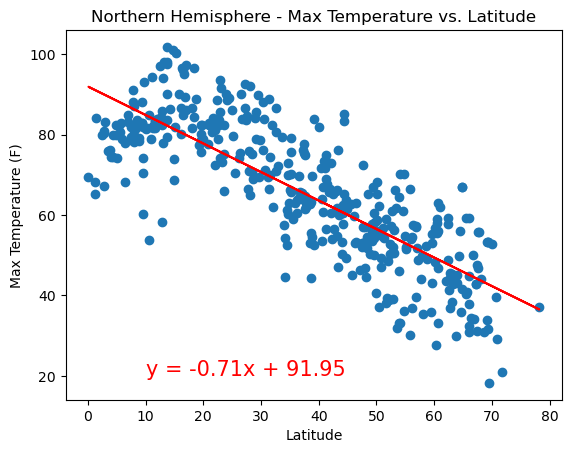

In [19]:
# Linear regression plot on Northern Hemisphere - Temperature vs. Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r")

# Annotate the equation of the line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (10, 20), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temperature vs. Latitude")

# Show plot
plt.show()


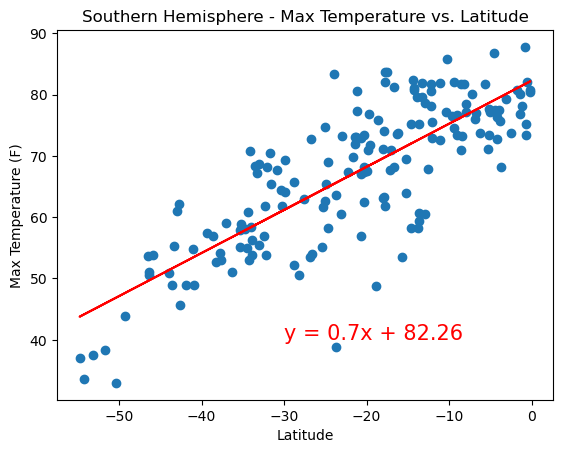

In [20]:
# Linear regression plot on Southern Hemisphere - Temperature vs. Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r")

# Annotate the equation of the line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (-30, 40), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temperature vs. Latitude")

# Show plot
plt.show()


**Discussion about the linear relationship:** In the Southern Hemisphere, the linear regression equation y = 0.7x + 82.26 shows that as you move closer to the equator (lower latitudes), the temperature tends to increase. Conversely, in the Northern Hemisphere, the linear regression equation y = -0.71x + 91.95 indicates that as you move further away from the equator (higher latitudes), the temperature tends to decrease. These findings suggest that there is a general trend of temperature decreasing as you move away from the equator in either hemisphere.

### Humidity vs. Latitude Linear Regression Plot

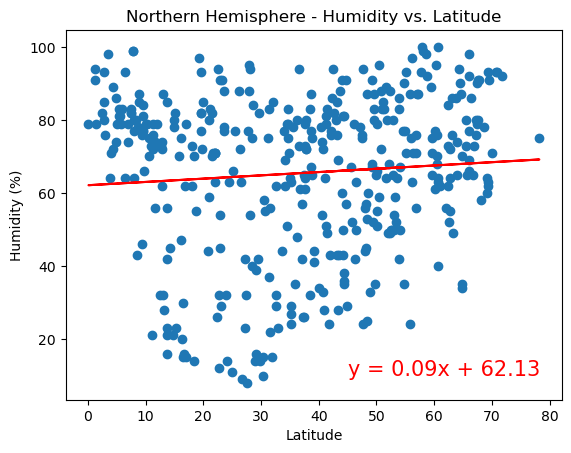

In [21]:
# Northern Hemisphere Humidity vs. Latitude Linear Regression Plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r")

# Annotate the equation of the line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (45, 10), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude")

# Show plot
plt.show()


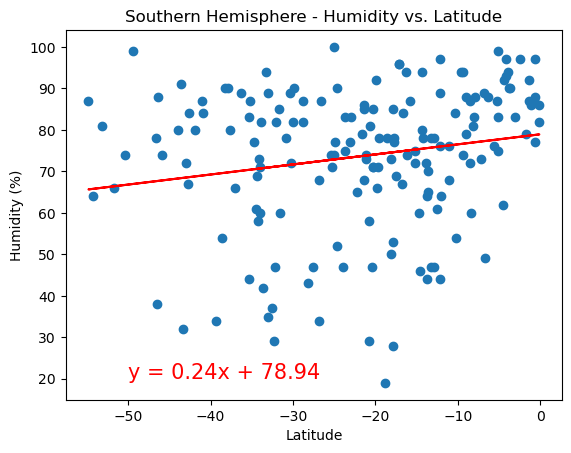

In [22]:
# Southern Hemisphere Humidity vs. Latitude Linear Regression Plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r")

# Annotate the equation of the line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude")

# Show plot
plt.show()


**Discussion about the linear relationship:** In the Southern Hemisphere, there is a slight positive correlation between humidity and latitude, as indicated by the linear regression equation y = 0.24x + 78.94. This means that as you move away from the equator (higher latitudes), humidity tends to increase slightly. On the other hand, in the Northern Hemisphere, there is a weak negative correlation between humidity and latitude, as shown by the equation y = 0.09x + 62.13. This suggests that as you move further away from the equator (higher latitudes), humidity tends to slightly decrease. These findings imply that there are differences in humidity patterns between the two hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

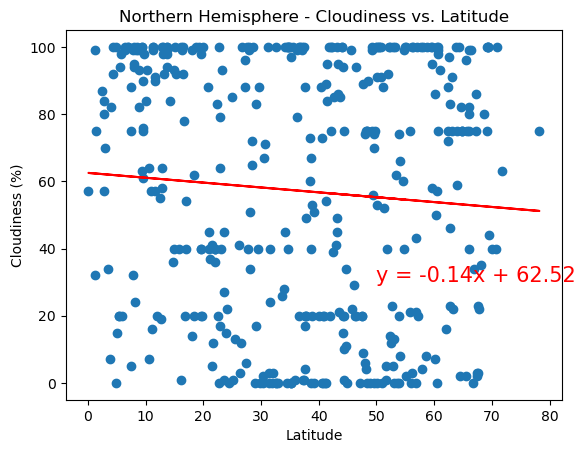

In [23]:
# Northern Hemisphere Cloudiness vs. Latitude Linear Regression Plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r")

# Annotate the equation of the line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (50, 30), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")

# Show plot
plt.show()


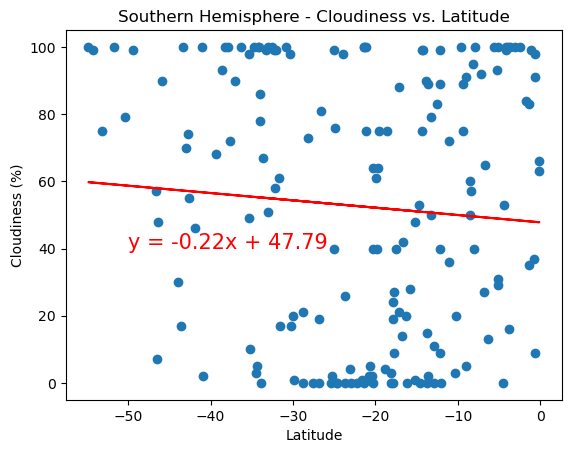

In [24]:
# Southern Hemisphere Cloudiness vs. Latitude Linear Regression Plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r")

# Annotate the equation of the line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (-50, 40), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")

# Show plot
plt.show()


**Discussion about the linear relationship:** Both hemispheres exhibit a similar pattern in cloudiness with respect to latitude. In the Northern Hemisphere, the linear regression equation y = -0.14x + 62.52 indicates a slight negative correlation, suggesting that as you move away from the equator (higher latitudes), cloudiness tends to slightly decrease. Similarly, in the Southern Hemisphere, the linear regression equation y = -0.22x + 47.79 shows a moderate negative correlation, indicating that as you move closer to the equator (lower latitudes), cloudiness tends to decrease. These findings suggest a general trend of decreasing cloudiness as you move away from the equator in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

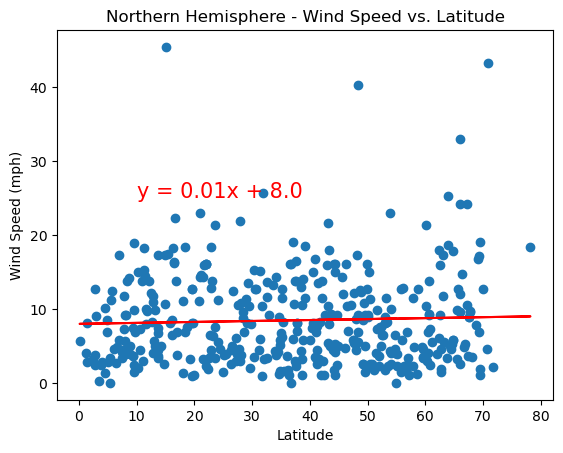

In [25]:
# Northern Hemisphere Wind Speed vs. Latitude Linear Regression Plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r")

# Annotate the equation of the line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (10, 25), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")

# Show plot
plt.show()


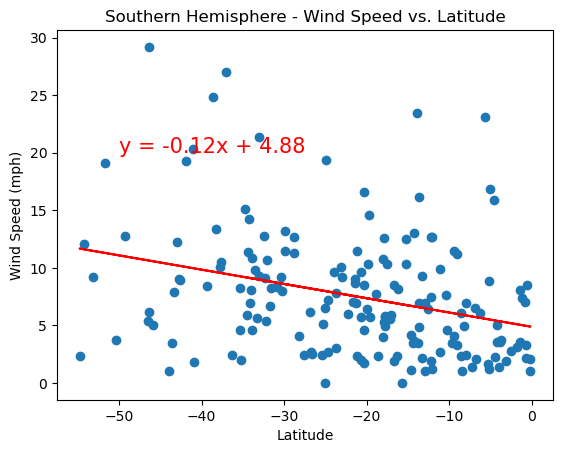

In [26]:
# Southern Hemisphere Wind Speed vs. Latitude Linear Regression Plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression line values
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r")

# Annotate the equation of the line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")

# Show plot
plt.show()


**Discussion about the linear relationship:** The relationship between wind speed and latitude varies in the two hemispheres. In the Northern Hemisphere, the linear regression equation y = 0.01x + 8.0 suggests that there is no significant correlation between wind speed and latitude. On the other hand, in the Southern Hemisphere, the linear regression equation y = -0.12x + 4.88 indicates a slight negative correlation. This means that as you move closer to the equator (lower latitudes), wind speed tends to decrease slightly. These findings highlight the potential differences in wind speed patterns between the two hemispheres.